In [1]:
import xlrd
import pandas as pd
import re
import numpy as np

In [2]:
data = pd.read_excel('Data/KMK-Liste_Splitterberufe_2015.xlsx')

In [3]:
file = 'Data/KMK-Liste_Splitterberufe_2015.xlsx'
workbook = xlrd.open_workbook(file)

In [4]:
sheets = workbook.sheet_names()

In [5]:
extractedData = pd.DataFrame(columns=["TableName","EintragNr","Beruf","Land","Stadt","besuchendesLand"])
extractedData

,TableName,EintragNr,Beruf,Land,Stadt,besuchendesLand


In [6]:
berufArr = []
landArr = []
besucherArr = []
npData = np.array(["tableName","EintragNr","Beruf","Land","Stadt","besuchendesLand"],dtype="object")
print(npData.dtype)
tmpNpData = np.array(["tableName","EintragNr","Beruf","Land","Stadt","besuchendesLand"],dtype="object")
besucherData = np.array(["tableName","EintragNr","besuchendesLand"],dtype="object")
tmpBesuchData = np.array(["tableName","EintragNr","besuchendesLand"],dtype="object")
e = " "
for s in sheets:
    sheet = workbook.sheet_by_name(s)
    beruf = []
    land = []
    besuch = []
    beruf.append(s)
    land.append(s)
    besuch.append(s)
    eintragNr = 0
    eintragNrBesuch = 0
    tmpNpData[0] = s
    tmpBesuchData[0] = s
    for i, row in enumerate(range(sheet.nrows)):
        if i <=0:
            continue
        for j, col in enumerate(range(sheet.ncols)):
            if re.search("(HwO)|(Hw)|(BBiG)|(FB)|(OED)|(ÖD)|(öD)|(LW)|(Lw)|(I)|(IH)|(Seeverkehr)", str(sheet.cell_value(i,j))):
                if i==2:
                    tmpString = sheet.cell_value(i-1, j) + " " + sheet.cell_value(i, j)
                if i==3:
                    tmpString = sheet.cell_value(i-2, j) + " " + sheet.cell_value(i-1, j) + " " + sheet.cell_value(i, j)
                if i==1: 
                    tmpString = sheet.cell_value(i, j)
                e = tmpString.split(")")
                beruf.append(e[0]+")")
                #print(beruf)
                berufArr.append(beruf)
                tmpNpData[2] = e[0]+")"
                
            
            if re.search("(Berlin)|(Bayern)|(Brandenburg)|(Bremen)|(Mecklenburg-Vorpommern)|(Rheinland-Pfalz)|(Sachsen-Anhalt)|(Niedersachsen)|(Sachsen)|(Saarland)|(Hamburg)|(Hessen)|(Baden-Württemberg)|(Nordrhein-Westfalen)|(Schleswig-Holstein)|(Thüringen)"
                         , str(sheet.cell_value(i-1,j))):
                if (re.search("\(", sheet.cell_value(i-1,j)) or re.search("\(", sheet.cell_value(i,j))):
                    land.append(sheet.cell_value(i-1,j))
                    tmpNpData[3] = sheet.cell_value(i-1,j)
                    tmpNpData[1] = eintragNr
                    eintragNr = eintragNr + 1
                    npData = np.vstack((npData,tmpNpData))
            if re.search("(alle Länder)", str(sheet.cell_value(i,j))):
                besuch.append(sheet.cell_value(i,j))
            if re.search("[A-Z]{2}", str(sheet.cell_value(i,j))):
                if re.search("(HwO)|(BBiG)|(FB)|(OED)|(ÖD)|(LW)|(II)|(KIM)|(RBZ)|(OT)|(OSZ)|(IV)|[a-z]", sheet.cell_value(i,j)):
                    continue
                besuch.append(sheet.cell_value(i,j))
    
    tmpS = besuch[1:]
    correctedBesuch = ""
    for k, st in enumerate(tmpS):
        correctedBesuch = st
        if k>0:
            if tmpS[k-1][-1]==",":
                correctedBesuch = tmpS[k-1] + " " + tmpS[k]
        if correctedBesuch[-1]==",":
            continue
        else:
            tmpBesuchData[1] = eintragNrBesuch
            tmpBesuchData[2] = correctedBesuch
            eintragNrBesuch = eintragNrBesuch +1
            besucherData = np.vstack((besucherData, tmpBesuchData))
        
    #print("besuch ", besuch)
    landArr.append(land)            

object


In [7]:
for data in npData:
    for besuch in besucherData:
        if (data[0]==besuch[0]) & (data[1]==besuch[1]):
            data[-1] = besuch[2]
            print(data)

['tableName' 'EintragNr' 'Beruf' 'Land' 'Stadt' 'besuchendesLand']
['Table 3' 0 'Änderungsschneider und Änderungsschneiderin (HwO)'
 'Sachsen (Dresden)' 'Stadt' 'BB1), MV, SN, ST']
['Table 4' 0 'Asphaltbauer und Asphaltbauerin (BBiG)'
 'Nordrhein-Westfalen (Essen)' 'Stadt' 'alle Länder']
['Table 5' 0 'Aufbereitungsmechaniker und Aufbereitungsmechanikerin (BBiG)'
 'Bayern (Wiesau)' 'Stadt'
 'BW, BY, BB, HH, HE, MV, NI, NW, SL, SN, ST, SH, TH']
['Table 6' 0 'Aufbereitungsmechaniker und Aufbereitungsmechanikerin (BBiG)'
 'Bayern (Wiesau)' 'Stadt' 'BW, BY, NW']
['Table 6' 1 'Aufbereitungsmechaniker und Aufbereitungsmechanikerin (BBiG)'
 'Thüringen (Erfurt)' 'Stadt' 'BB2), HH, HE,MV, NI, RP, SL, SN, ST, SH, TH']
['Table 7' 0 'Automatenfachmann und Automatenfachfrau (BBiG)'
 'Berlin (Berlin)' 'Stadt' 'BB, BE, MV, SN, ST']
['Table 7' 1 'Automatenfachmann und Automatenfachfrau (BBiG)'
 'Hessen (Offenbach am Main) Gewerblich-technische Schulen der Stadt Offenbach am Main Schlossgrabengasse 10'


In [8]:
extractedData = pd.DataFrame(data=npData,columns=["TableName","EintragNr","Beruf","Land","Stadt","besuchendesLand"])
extractedData

,TableName,EintragNr,Beruf,Land,Stadt,besuchendesLand
0,tableName,EintragNr,Beruf,Land,Stadt,besuchendesLand
1,Table 3,0,Änderungsschneider und Änderungsschneiderin (HwO),Sachsen (Dresden),Stadt,"BB1), MV, SN, ST"
2,Table 4,0,Asphaltbauer und Asphaltbauerin (BBiG),Nordrhein-Westfalen (Essen),Stadt,alle Länder
3,Table 5,0,Aufbereitungsmechaniker und Aufbereitungsmecha...,Bayern (Wiesau),Stadt,"BW, BY, BB, HH, HE, MV, NI, NW, SL, SN, ST, SH..."
4,Table 6,0,Aufbereitungsmechaniker und Aufbereitungsmecha...,Bayern (Wiesau),Stadt,"BW, BY, NW"
5,Table 6,1,Aufbereitungsmechaniker und Aufbereitungsmecha...,Thüringen (Erfurt),Stadt,"BB2), HH, HE,MV, NI, RP, SL, SN, ST, SH, TH"
6,Table 7,0,Automatenfachmann und Automatenfachfrau (BBiG),Berlin (Berlin),Stadt,"BB, BE, MV, SN, ST"
7,Table 7,1,Automatenfachmann und Automatenfachfrau (BBiG),Hessen (Offenbach am Main) Gewerblich-technisc...,Stadt,"HE, TH"
8,Table 7,2,Automatenfachmann und Automatenfachfrau (BBiG),Nordrhein-Westfalen (Lübbecke),Stadt,"HB, HH, NI, NW, SL, SH"
9,Table 8,0,Baugeräteführer und Baugeräteführerin (BBiG),Baden-Württemberg,Stadt,"BW, RP, SL"


In [9]:
extractedData.to_excel('saveExtractedDataRVSplit15.xlsx')

In [10]:
lands = extractedData['Land'].values

In [11]:
splitedLand = np.array(0)
splitedStadt = np.array(0)
print(splitedLand)
for land in lands:
    tmpLand = land.split('(')
    splitedLand = np.vstack((splitedLand,tmpLand[0]))
    tmpStadt = tmpLand[-1].split(')')
    splitedStadt = np.vstack((splitedStadt,tmpStadt[0]))

0


In [12]:
cleanData = extractedData.copy()

In [13]:
cleanData['Land'] = splitedLand[1:]

In [14]:
cleanData['Stadt'] = splitedStadt[1:]

In [15]:
cleanData.head()

,TableName,EintragNr,Beruf,Land,Stadt,besuchendesLand
0,tableName,EintragNr,Beruf,Land,Land,besuchendesLand
1,Table 3,0,Änderungsschneider und Änderungsschneiderin (HwO),Sachsen,Dresden,"BB1), MV, SN, ST"
2,Table 4,0,Asphaltbauer und Asphaltbauerin (BBiG),Nordrhein-Westfalen,Essen,alle Länder
3,Table 5,0,Aufbereitungsmechaniker und Aufbereitungsmecha...,Bayern,Wiesau,"BW, BY, BB, HH, HE, MV, NI, NW, SL, SN, ST, SH..."
4,Table 6,0,Aufbereitungsmechaniker und Aufbereitungsmecha...,Bayern,Wiesau,"BW, BY, NW"


In [16]:
cleanData[cleanData['Land'] == 'Bayern ']['Stadt'].unique()

array(['Wiesau', 'Selb', 'Nürnberg', 'Gunzenhausen', 'Kulmbach',
       'Mittenwald', 'Karlstadt', 'Rothenburg o.d.T.', 'Bad Kissingen',
       'Lauingen', 'Schweinfurt', 'Straubing', 'Zwiesel', 'Fürth',
       'Starnberg', 'Lichtenfels', 'München', 'Erding', 'Pegnitz',
       'Augsburg', 'Rosenheim', 'Würzburg', 'Landshut', 'Eichstätt',
       'Münchberg', 'Kelheim', 'Neustadt/Saale', 'Freising', 'Wunsiedel',
       'Wasserburg am Inn', 'Regensburg', 'Triesdorf'], dtype=object)

In [17]:
cleanData[cleanData['Land'] == 'Bayern '].count()

TableName          77
EintragNr          77
Beruf              77
Land               77
Stadt              77
besuchendesLand    77
dtype: int64

In [18]:
cleanData[cleanData['Stadt'] == 'München'].count()

TableName          10
EintragNr          10
Beruf              10
Land               10
Stadt              10
besuchendesLand    10
dtype: int64

In [19]:
cleanData[cleanData['Stadt'] == 'Karlstadt'].count()

TableName          1
EintragNr          1
Beruf              1
Land               1
Stadt              1
besuchendesLand    1
dtype: int64

In [20]:
cleanData[cleanData['Land'] == 'Nordrhein-Westfalen ']['Stadt'].unique()

array(['Essen', 'Lübbecke', 'Gelsenkirchen', 'Beckum', 'Dortmund', 'Hagen',
       'Rheinbach', 'Solingen', 'Köln', 'Herford', 'Soest'], dtype=object)

In [21]:
cleanData[cleanData['Land'] == 'Nordrhein-Westfalen '].count()

TableName          23
EintragNr          23
Beruf              23
Land               23
Stadt              23
besuchendesLand    23
dtype: int64

In [22]:
cleanData[cleanData['Stadt'] == 'Köln'].count()

TableName          2
EintragNr          2
Beruf              2
Land               2
Stadt              2
besuchendesLand    2
dtype: int64

In [23]:
cleanData['Stadt'].unique()

array(['Land', 'Dresden', 'Essen', 'Wiesau', 'Erfurt', 'Berlin',
       'Offenbach am Main', 'Lübbecke', 'Baden-Württemberg', 'Friesack',
       'Gelsenkirchen', 'Meiningen', 'Selb', 'Beckum', 'Nürnberg',
       'Nordrhein-Westfalen', 'Gunzenhausen', 'Sachsen-Anhalt',
       'Sondershausen', 'Freiberg', 'Kulmbach', 'Bad Kissingen', 'Ulm',
       'Eilenburg', 'Schönebeck', 'Bitterfeld', 'Lübeck', 'Sonneberg',
       'Stade', 'Plauen', 'Mittenwald', 'Klingenthal',
       'Schleswig-Holstein', 'Karlstadt', 'Bremen', 'Dortmund',
       'Niedersachsen', 'Leipzig', 'Neumünster', 'Pößneck', 'Ehingen',
       'Zella-Mehlis', 'Rothenburg o.d.T.', 'Schwarzheide', 'Hamburg',
       'Radebeul', 'Seiffen', 'Zwickau', 'Mainz', 'Lauingen', 'Burg',
       'Schweinfurt', 'Zeven', 'Trier', 'Chemnitz', 'Wittenberg',
       'Frankfurt am Main', 'Calw', 'Waren/Müritz', 'Hannover', 'Goslar',
       'Geisenheim', 'Friedberg', 'Hagenow', 'Pirmasens', 'Prenzlau',
       'Rüsselsheim', 'Freital', 'Straubing', '

In [28]:
cleanData['Land'].unique()

array(['Land', 'Sachsen ', 'Nordrhein-Westfalen ', 'Bayern ', 'Thüringen ',
       'Berlin ', 'Hessen ', 'Baden-Württemberg', 'Brandenburg ',
       'Nordrhein-Westfalen', 'Sachsen-Anhalt', 'Bestattungsfachkraft ',
       'Baden-Württemberg ', 'Sachsen-Anhalt ', 'Schleswig-Holstein ',
       'Niedersachsen ', 'Schleswig-Holstein', 'Bremen ', 'Niedersachsen',
       'Hamburg ', 'Rheinland-Pfalz ', 'Mecklenburg-Vorpommern ',
       'Fachkraft Agrarservice ', 'Fachkraft im Fahrbetrieb ', '',
       'Bayern', 'Rheinland-Pfalz', '10969 Berlin',
       'Mecklenburg-Vorpommern', 'Brandenburg', 'Saarland ',
       'Staatliches Berufsschulzentrum Hermsdorf '], dtype=object)

In [25]:
countList = []
for stadt in cleanData[cleanData['Land']=='Bayern ']['Stadt'].unique():
    count = cleanData[cleanData['Stadt']==stadt]['Stadt'].count()
    countList.append(count)
    print("Stadt: ", stadt, " hat Besucher: ", count)

Stadt:  Wiesau  hat Besucher:  4
Stadt:  Selb  hat Besucher:  9
Stadt:  Nürnberg  hat Besucher:  2
Stadt:  Gunzenhausen  hat Besucher:  1
Stadt:  Kulmbach  hat Besucher:  1
Stadt:  Mittenwald  hat Besucher:  4
Stadt:  Karlstadt  hat Besucher:  1
Stadt:  Rothenburg o.d.T.  hat Besucher:  1
Stadt:  Bad Kissingen  hat Besucher:  3
Stadt:  Lauingen  hat Besucher:  5
Stadt:  Schweinfurt  hat Besucher:  1
Stadt:  Straubing  hat Besucher:  1
Stadt:  Zwiesel  hat Besucher:  7
Stadt:  Fürth  hat Besucher:  2
Stadt:  Starnberg  hat Besucher:  2
Stadt:  Lichtenfels  hat Besucher:  1
Stadt:  München  hat Besucher:  10
Stadt:  Erding  hat Besucher:  1
Stadt:  Pegnitz  hat Besucher:  2
Stadt:  Augsburg  hat Besucher:  1
Stadt:  Rosenheim  hat Besucher:  1
Stadt:  Würzburg  hat Besucher:  2
Stadt:  Landshut  hat Besucher:  1
Stadt:  Eichstätt  hat Besucher:  1
Stadt:  Münchberg  hat Besucher:  4
Stadt:  Kelheim  hat Besucher:  1
Stadt:  Neustadt/Saale  hat Besucher:  1
Stadt:  Freising  hat Besucher:

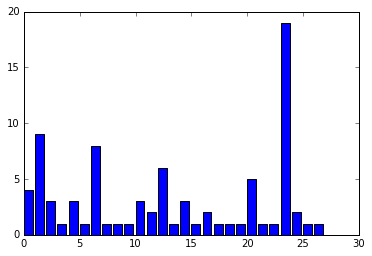

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
# the histogram of the data
x = np.arange(27)
plt.bar(x, countList)
plt.show()

In [26]:
cleanData.to_excel('saveCleanedDataRVSplit12-15.xlsx')

In [27]:
cleanData.head()

,TableName,EintragNr,Beruf,Land,Stadt,besuchendesLand
0,tableName,EintragNr,Beruf,Land,Land,besuchendesLand
1,Table 3,0,Änderungsschneider und Änderungsschneiderin (HwO),Sachsen,Dresden,"BB1), MV, SN, ST"
2,Table 4,0,Asphaltbauer und Asphaltbauerin (BBiG),Nordrhein-Westfalen,Essen,alle Länder
3,Table 5,0,Aufbereitungsmechaniker und Aufbereitungsmecha...,Bayern,Wiesau,"BW, BY, BB, HH, HE, MV, NI, NW, SL, SN, ST, SH..."
4,Table 6,0,Aufbereitungsmechaniker und Aufbereitungsmecha...,Bayern,Wiesau,"BW, BY, NW"


In [29]:
cleanData['BW'] = 0
cleanData['BE'] = 0
cleanData['BB'] = 0
cleanData['TH'] = 0
cleanData['ST'] = 0
cleanData['HH'] = 0
cleanData['HE'] = 0
cleanData['SH'] = 0
cleanData['ST'] = 0

In [41]:
landList = cleanData['Land'].unique()

In [42]:
landList.size

23

In [43]:
landList

array(['Land', 'Sachsen', 'Nordrhein-Westfalen', 'Bayern', 'Thüringen',
       'Berlin', 'Hessen', 'Baden-Württemberg', 'Brandenburg',
       'Sachsen-Anhalt', 'Bestattungsfachkraft ', 'Schleswig-Holstein',
       'Niedersachsen', 'Bremen', 'Hamburg', 'Rheinland-Pfalz',
       'Mecklenburg-Vorpommern', 'Fachkraft Agrarservice ',
       'Fachkraft im Fahrbetrieb ', '', '10969 Berlin', 'Saarland',
       'Staatliches Berufsschulzentrum Hermsdorf '], dtype=object)

In [33]:
s = "Nordrhein-Westfalen"
tempLand = cleanData[cleanData['Land'] == 'Nordrhein-Westfalen ']['Land'].values

In [36]:
cleanData.loc[cleanData['Land'] == 'Nordrhein-Westfalen ', ['Land']] = "Nordrhein-Westfalen"
cleanData.loc[cleanData['Land'] == 'Berlin ', ['Land']] = "Berlin"
cleanData.loc[cleanData['Land'] == 'Hamburg ', ['Land']] = "Hamburg"
cleanData.loc[cleanData['Land'] == 'Bayern ', ['Land']] = "Bayern"
cleanData.loc[cleanData['Land'] == 'Thüringen ', ['Land']] = "Thüringen" 
cleanData.loc[cleanData['Land'] == 'Baden-Württemberg ', ['Land']] = "Baden-Württemberg"
cleanData.loc[cleanData['Land'] == 'Sachsen ', ['Land']] = "Sachsen"
cleanData.loc[cleanData['Land'] == 'Sachsen-Anhalt ', ['Land']] = "Sachsen-Anhalt"
cleanData.loc[cleanData['Land'] == 'Schleswig-Holstein ', ['Land']] = "Schleswig-Holstein"
cleanData.loc[cleanData['Land'] == 'Brandenburg ', ['Land']] = "Brandenburg"
cleanData.loc[cleanData['Land'] == 'Niedersachsen ', ['Land']] = "Niedersachsen"
cleanData.loc[cleanData['Land'] == 'Hessen ', ['Land']] = "Hessen"
cleanData.loc[cleanData['Land'] == 'Rheinland-Pfalz ', ['Land']] = "Rheinland-Pfalz"
cleanData.loc[cleanData['Land'] == 'Saarland ', ['Land']] = "Saarland"
cleanData.loc[cleanData['Land'] == 'Mecklenburg-Vorpommern ', ['Land']] = "Mecklenburg-Vorpommern"
cleanData.loc[cleanData['Land'] == 'Bremen ', ['Land']] = "Bremen"

In [39]:
landList = cleanData['Land'].unique()

In [40]:
landList.size

23

In [44]:
landList

array(['Land', 'Sachsen', 'Nordrhein-Westfalen', 'Bayern', 'Thüringen',
       'Berlin', 'Hessen', 'Baden-Württemberg', 'Brandenburg',
       'Sachsen-Anhalt', 'Bestattungsfachkraft ', 'Schleswig-Holstein',
       'Niedersachsen', 'Bremen', 'Hamburg', 'Rheinland-Pfalz',
       'Mecklenburg-Vorpommern', 'Fachkraft Agrarservice ',
       'Fachkraft im Fahrbetrieb ', '', '10969 Berlin', 'Saarland',
       'Staatliches Berufsschulzentrum Hermsdorf '], dtype=object)

In [45]:
cleanData[cleanData['Land'] == 'Berg- und Maschinenmann ']

,TableName,EintragNr,Beruf,Land,Stadt,besuchendesLand,BW,BE,BB,TH,ST,HH,HE,SH


In [272]:
cleanData.loc[cleanData['Land'] == 'Ziseleurin)                                       Thüringen ', ['Land']] = "Thüringen"
cleanData.loc[cleanData['Land'] == 'Fachkraft für Lebensmitteltechnik ', ['Land']] = "Baden-Württemberg"
cleanData.loc[cleanData['Land'] == 'Bergmechaniker ', ['Land']] = "Saarland"
cleanData.loc[cleanData['Land'] == 'Fachkraft für Fruchtsafttechnik ', ['Land']] = "Hessen"
cleanData.loc[cleanData['Land'] == 'Rollladen- und Jalousiebauerin)           Nordrhein-Westfalen', ['Land']] = "Nordrhein-Westfalen"
cleanData.loc[cleanData['Land'] == 'Industriekeramikerin)                           Thüringen ', ['Land']] = "Thüringen"
cleanData.loc[cleanData['Land'] == 'Bestattungsfachkraft ', ['Land']] = "Bayern"
cleanData.loc[cleanData['Land'] == 'Fachkraft im Fahrbetrieb ', ['Land']] = "Sachsen"
cleanData.loc[cleanData['Land'] == 'Fachkraft Agrarservice ', ['Land']] = "Niedersachsen"
cleanData.loc[cleanData['Land'] == 'Staatliches Berufsschulzentrum Hermsdorf ', ['Land']] = "Thüringen"
cleanData.loc[cleanData['Land'] == 'Berg- und Maschinenmann ', ['Land']] = "Sachsen"
cleanData.loc[cleanData['Land'] == 'BBiG/HwO)                                          Schleswig-Holstein ', ['Land']] = "Schleswig-Holstein"

In [46]:
cleanData.to_excel('saveCleanedDataRVSplit12-15.xlsx')

In [274]:
cleanData.head()

,TableName,EintragNr,Beruf,Land,Stadt,besuchendesLand
0,tableName,EintragNr,Beruf,Land,Land,besuchendesLand
1,Table 3,0,Asphaltbauer/ Asphaltbauerin (BBiG),Nordrhein-Westfalen,Essen,alle Länder
2,Table 4,0,Aufbereitungsmechaniker/ Aufbereitungsmechanik...,Bayern,Wiesau,"BW, BY, SL, SN, ST, TH"
3,Table 4,1,Aufbereitungsmechaniker/ Aufbereitungsmechanik...,Nordrhein-Westfalen,Duisburg,"BB, HB, HH, HE, MV, NI, NW, SH"
4,Table 5,0,Aufbereitungsmechaniker/ Aufbereitungsmechanik...,Bayern,Wiesau,"BW, BY"


In [250]:
cleanData.loc[cleanData['TableName']== 'Table 149']

,TableName,EintragNr,Beruf,Land,Stadt,besuchendesLand
267,Table 149,0,Medientechnologe Druckverarbei- tung/ Mediente...,Sachsen,Leipzig,"BB1), SN, ST"
268,Table 149,1,Medientechnologe Druckverarbei- tung/ Mediente...,Schleswig-Holstein,Neumünster,"HH, SH"
269,Table 149,2,Medientechnologe Druckverarbei- tung/ Mediente...,Thüringen,Pößneck,"MV, ST, TH"
